![sslogo](https://github.com/stratascratch/stratascratch.github.io/raw/master/assets/sslogo.jpg)

# Computation on NumPy Arrays: Universal Functions

Up until now, we have been discussing some of the basic nuts and bolts of NumPy; in the next few sections, we will dive into the reasons that NumPy is so important in the Python data science world.
Namely, it provides an easy and flexible interface to optimized computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow.
The key to making it fast is to use *vectorized* operations, generally implemented through NumPy's *universal functions* (ufuncs).
This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient.
It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.
Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [89]:
import numpy as np

In [90]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well:

In [91]:
x = np.arange(9).reshape((3, 3))
2 ** x


array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

## Exploring NumPy's UFuncs

Ufuncs exist in two flavors: *unary ufuncs*, which operate on a single input, and *binary ufuncs*, which operate on two inputs.
We'll see examples of both these types of functions here.

### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators.
The standard addition, subtraction, multiplication, and division can all be used:

In [92]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 3)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 0 1]


There is also a unary ufunc for negation, and a ``**`` operator for exponentiation, and a ``%`` operator for modulus:

In [93]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In addition, these can be strung together however you wish, and the standard order of operations is respected:

In [94]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the ``+`` operator is a wrapper for the ``add`` function:

In [95]:
print(x)
np.add(x, 2)

[0 1 2 3]


array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|


### Absolute value

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [96]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

The corresponding NumPy ufunc is ``np.absolute``, which is also available under the alias ``np.abs``:

In [97]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [98]:
np.abs(x)

array([2, 1, 0, 1, 2])

This ufunc can also handle complex data, in which the absolute value returns the magnitude:

In [99]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
x
np.abs(x)

array([5., 5., 2., 1.])

### Trigonometric functions

NumPy provides a large number of useful ufuncs, and some of the most useful for the data scientist are the trigonometric functions.
We'll start by defining an array of angles:

In [100]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values:

In [101]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


The values are computed to within machine precision, which is why values that should be zero do not always hit exactly zero.
Inverse trigonometric functions are also available:

In [102]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [103]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [104]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions that are useful for maintaining precision with very small input:

In [105]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When ``x`` is very small, these functions give more precise values than if the raw ``np.log`` or ``np.exp`` were to be used.

# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

In [106]:
import numpy as np

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [107]:
big_array = np.random.rand(1000000)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [108]:
np.min(big_array), np.max(big_array)

(2.3080335309622058e-07, 0.9999993939067704)

For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [109]:
print(big_array.min(), big_array.max(), big_array.sum())

2.3080335309622058e-07 0.9999993939067704 499994.44913324504


### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [110]:
M = np.random.random((3, 4))
print(M)

[[0.76957877 0.47364317 0.0681173  0.49434275]
 [0.41507339 0.95824533 0.30780108 0.27624422]
 [0.90451544 0.28405212 0.6533425  0.73987111]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [111]:
M.sum()

6.3448271771416564

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [112]:
M.min(axis=0)

array([0.41507339, 0.28405212, 0.0681173 , 0.27624422])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [113]:
M.max(axis=1)

array([0.76957877, 0.95824533, 0.90451544])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value.
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

In [114]:
import pandas as pd

#### Import Data

In [115]:
!ls

'[Lecture-1]Introduction-to-NumPy.ipynb'
'[Lecture-2]The-Basics-of-NumPy.ipynb'
'[Lecture-3]NumPy-Computations-and-Aggregations.ipynb'
 president_heights.csv


In [116]:
heights = pd.read_csv('president_heights.csv')

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the table datasets.president_heights, which is stored in the Strata Scratch database:

In [117]:
heights.head()

,id,name,height_cm
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [118]:
heights = heights['height_cm'].values
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [119]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [120]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib. For example, this code generates the following chart:

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

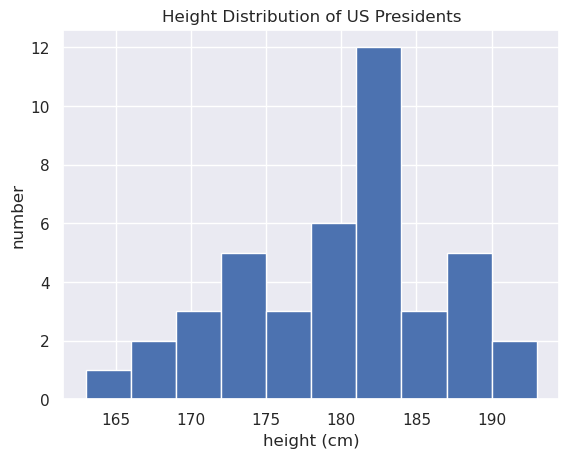

In [122]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');